# <center>ROC-AUC

In [22]:
import numpy as np
import pandas as pd
#from lib import plot_roc_curve

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#test case
from testerMF.testerMF import Tester 
testcase = Tester(userId='F14DM', day='3')

Соединение установлено


Функция для построения ROC-кривой

In [10]:
def plot_roc_curve(fpr, tpr, model_name="", default_figsize=True):
    if default_figsize: plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, '')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

### Цель

- Понять что такое ROC-кривая
- Понять что такое AUC
- Визуализировать результат работы алгоритма
- Оценить качество работы алгоритма 

### Данные

Есть тестовый набор данных с оценкой алгоритма бинарной классификации.
      
- subs_id - id абонента
- is_target - фактическое значение класса
- score - оценка алгоритма

In [11]:
df = pd.read_csv("score_df.csv", sep=';', decimal =',')
df.head()

,SUBS_ID,IS_TARGET,SCORE
0,2707921385,0,0.057832
1,230830642,0,0.092047
2,1134585239,0,0.006818
3,2715966464,0,0.146309
4,3742818457,0,0.127970


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 3 columns):
SUBS_ID      int64
IS_TARGET    int64
SCORE        float64
dtypes: float64(1), int64(2)
memory usage: 41.2 MB


In [13]:
df_target = df['IS_TARGET']
df_score = df['SCORE']

### Информация

Результат работы классификации с двумя классами часто визуализируют с помощью ROC-кривой, которая отображает соотношение между долей верно классифицированных объектов одного класса, и долей ошибочно классифицированных объектов другого класса.

В библиотеке sklearn уже реализована функция `roc_curve`, которая возвращает:

- FPR (False Positive Rate) - процент точек класса 0, которые неверно классифицированы алгоритмом
- TPR (True Positive Rate) - процент точек класса 1, которые верно классифицированы алгоритмом
- thresholds - пороги, которые использует функция для расчета FPR и TPR

In [48]:
fpr, tpr, thresholds = roc_curve(df_target, df_score)

No handles with labels found to put in legend.


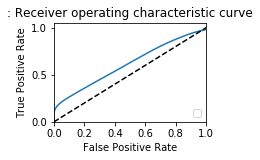

In [49]:
plt.subplot(223)
plot_roc_curve(fpr, tpr, "", default_figsize=False)

Качество работы алгоритма и количественно интерпретировать ROC-кривую можно при помощи AUC (Area Under Curve). 

AUC - площадь, ограниченная ROC-кривой.

Функция, которая рассчитывает AUC, также реализована в библиотеке sklearn `auc`

In [16]:
auc(fpr,tpr)

0.6138431036117282

### Задача

Вам необходимо самим реализовать функцию которая вернет FPR и TPR для разных treshold, чтобы построить ROC-кривую.

In [52]:
def my_roc_curve(df_target, df_score):
    tpr = []
    fpr = []
    t_num = 100
    thresholds = [i / t_num for i in range(t_num)]
    for i in thresholds:
        tp = df_target[(df_target == (df_score > i)) & (df_target == 1)].shape[0]
        tn = df_target[(df_target == (df_score > i)) & (df_target == 0)].shape[0]
        fp = df_target[(df_target != (df_score > i)) & (df_target == 0)].shape[0]
        fn = df_target[(df_target != (df_score > i)) & (df_target == 1)].shape[0]
        
            
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
            
        
    return fpr, tpr, thresholds

No handles with labels found to put in legend.


Решение отправлено на проверку
Начало тест кейса, получаем данные...
Test Case пройден


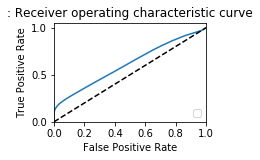

In [53]:
my_fpr, my_tpr, my_thresholds = my_roc_curve(df_target, df_score)

#проверим
testcase.isDone(part='1', task='1', func=my_roc_curve(df_target, df_score))


plt.subplot(223)
plot_roc_curve(my_fpr, my_tpr, "", default_figsize=False)

Реализуйте функцию, которая посчитает AUC.

In [54]:
def my_auc(fpr, tpr):
    auc = 0
    for i in range(1, len(tpr)):
        auc += ((fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1])) / 2
    return auc

In [55]:
my_auc = auc(my_fpr,my_tpr)

#проверим
testcase.sendAssert(part='1', task='2', val = auc(my_fpr,my_tpr), base = 0.61, clouse = ">=")
print('Ваш AUC - ', my_auc )

Решение отправлено на проверку
Начало тест кейса, получаем данные...
Test Case пройден
Ваш AUC -  0.6137877438925926
